## IEOR4004: The Zombie Apocalpse Game

Your mission is to leave the bunker and visit each necessary stop in  this town, making sure to include at least one of the grocery stores, to ensure your survival in the zombie apocalypse.
- Grocers: Where you'll grab food. (there are 2 of them, just visit one!)
- Pharmacy: For crucial medications.
- Hospital: To secure vaccinations.
- Gas Station: To fuel up the car for any quick escapes.

<br> Your task is to plan the most efficient route from the bunker, hitting these key points while avoiding unnecessary detours through zombie-infested areas. Your map is given below. 

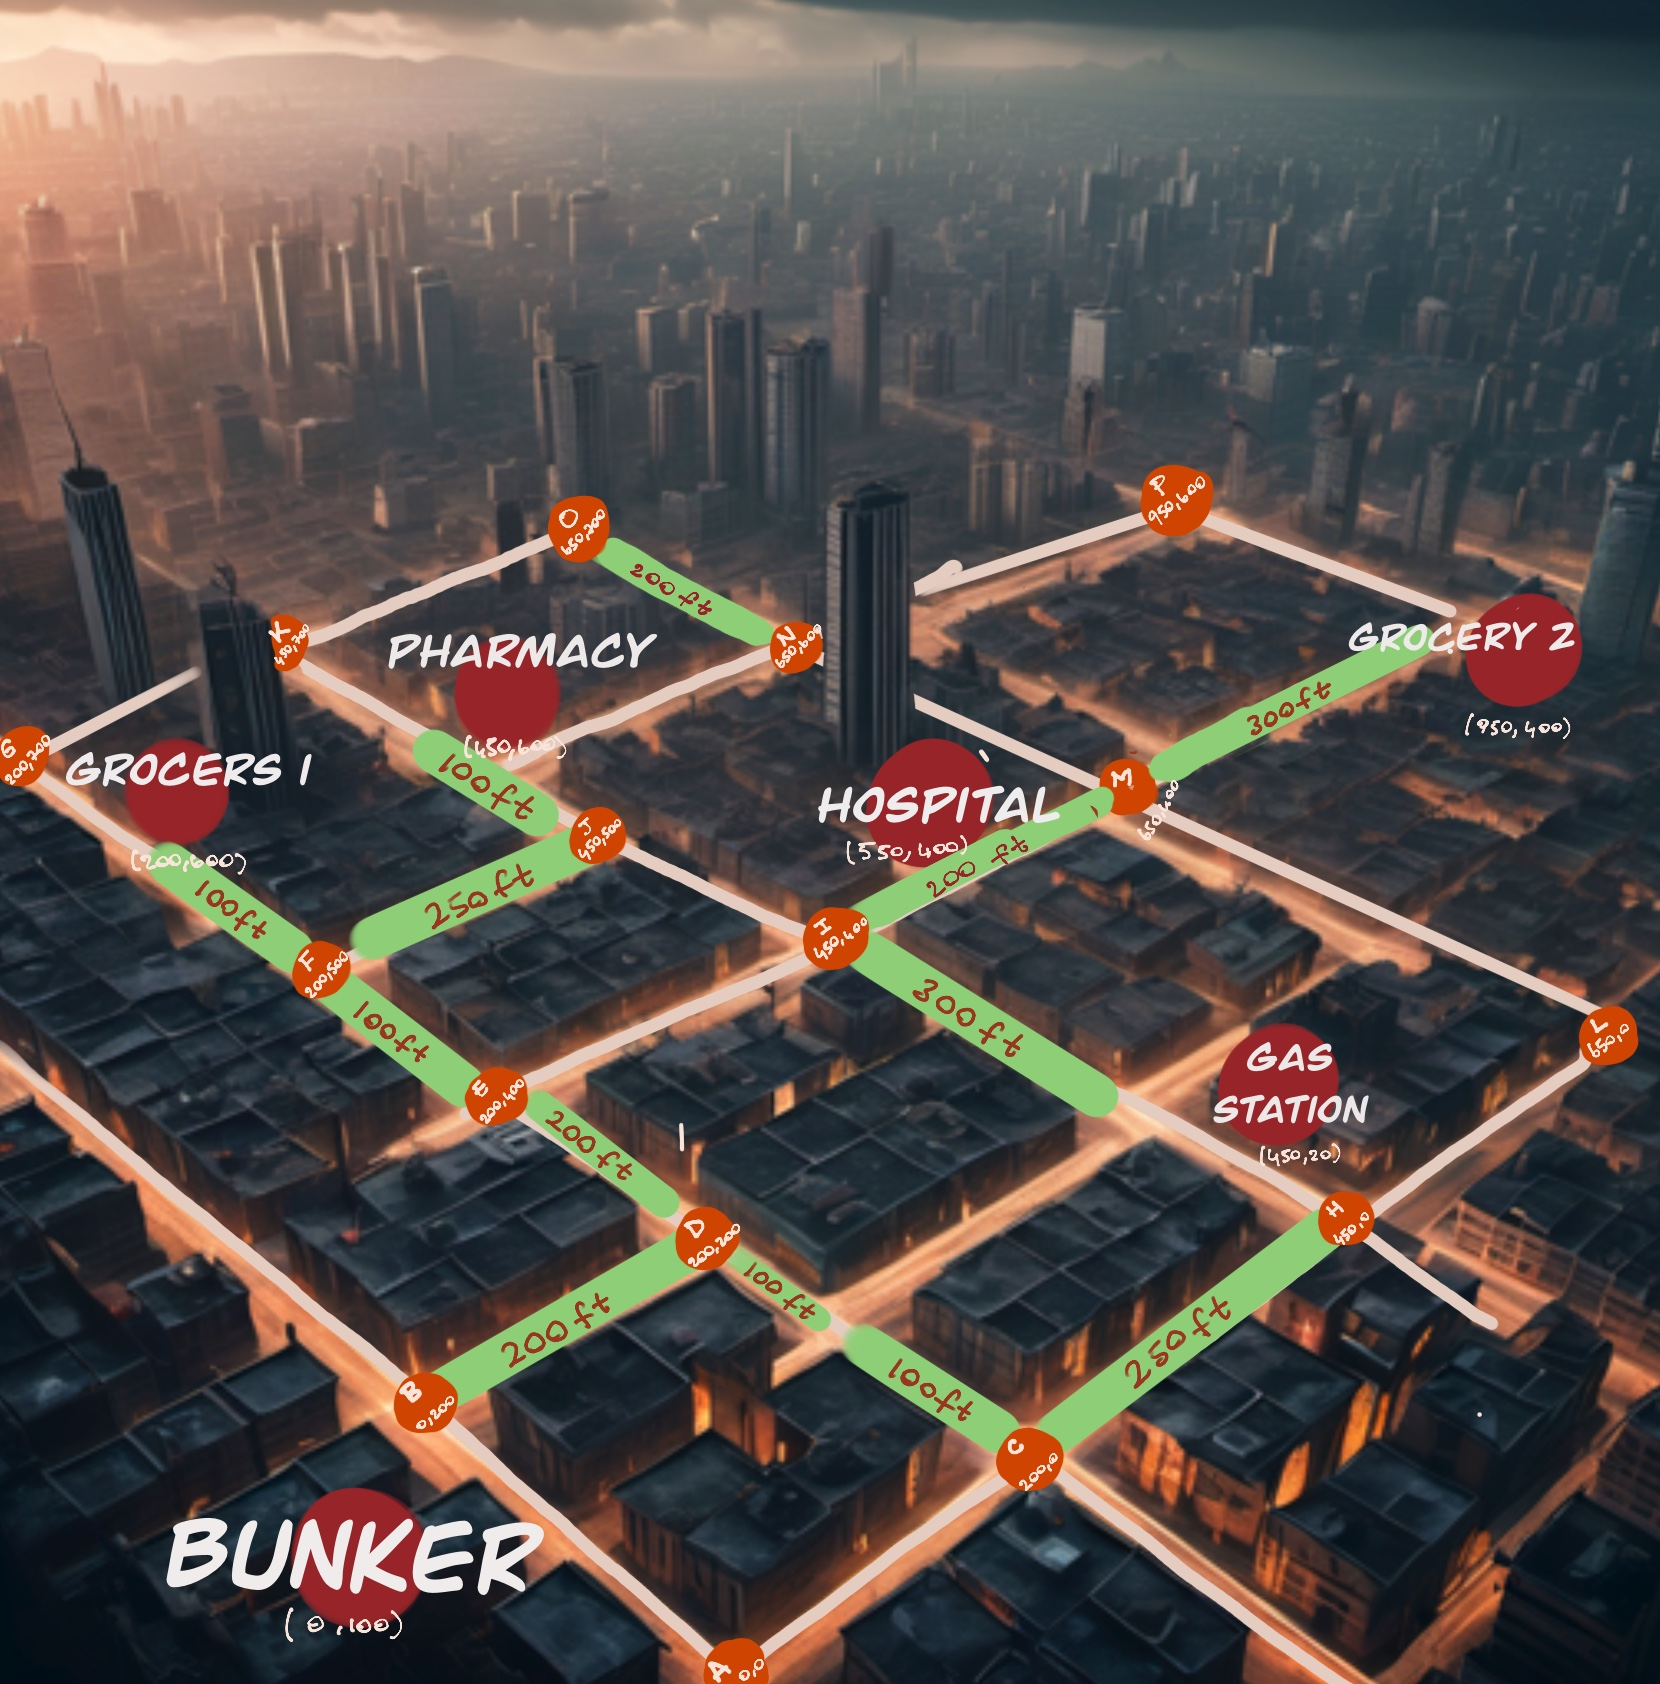

In [13]:
import networkx as nx
import matplotlib.pyplot as plt

import gurobipy as gp
from gurobipy import *

In [14]:
locations = {
    "Bunker": (0, 100),
    "Grocers1": (200, 600),
    "Pharmacy": (450, 600),
    "Hospital": (550, 400),
    "Grocers2": (950, 400),
    "GasStation": (450, 200),
    "A": (0,0),
    "B": (0,200),
    "C": (200, 0),
    "D": (200, 200),
    "E": (200, 400),
    "F": (200, 500),
    "G": (200, 700),
    "H": (450, 0),
    "I": (450, 400),
    "J": (450, 500),
    "K": (450, 700),
    "L": (650, 0),
    "M": (650, 400),
    "N": (650, 600),
    "O": (650, 700),
    "P": (950, 600)
}

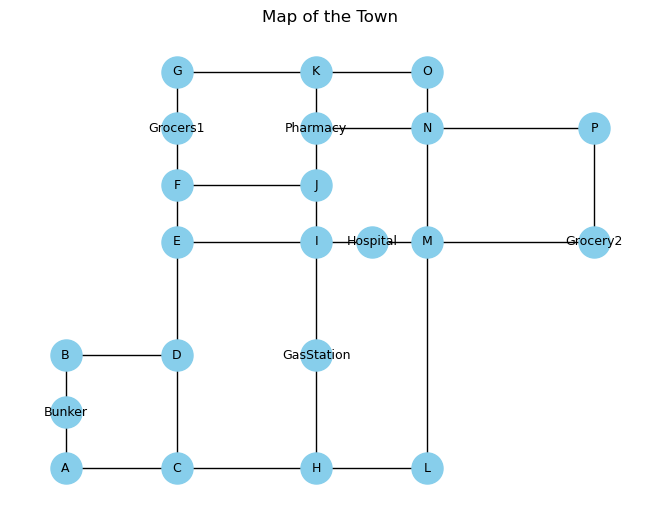

In [15]:
# Edges to be added to the graph, specified as pairs of node names
edges = [
    ("Bunker", "A"),
    ("Bunker", "B"),
    ("A", "C"),
    ("B", "D"),
    ("C", "D"),
    ("C", "H"),
    ("D", "E"),
    ("E", "I"),
    ("E", "F"),
    ("F", "J"),
    ("F", "Grocers1"),
    ("Grocers1", "G"),
    ("G", "K"),
    ("K", "O"),
    ("K","Pharmacy"),
    ("Pharmacy", "N"),
    ("Pharmacy", "J"),
    ("J", "I"),
    ("Hospital", "M"),
    ("I", "Hospital"),
    ("I", "GasStation"),
    ("GasStation", "H"),
    ("H", "L"),
    ("L", "M"),
    ("M", "Grocers2"), 
    ("Grocers2", "P"),
    ("P", "N"),
    ("N", "M"),
    ("N", "O")
]

# Create a graph
G = nx.Graph()

# Add nodes with positions
for node, pos in locations.items():
    G.add_node(node, pos=pos)

# Adding specified edges to the graph
G.add_edges_from(edges)

# Extract positions for nodes from the graph
pos = nx.get_node_attributes(G, 'pos')

# Draw the network
nx.draw(G, pos, with_labels=True, node_size=500, node_color='skyblue', font_size=9, font_color='black')
plt.title('Map of the Town')
plt.show()

If you need to remove certain edges, you can specify them in a similar list
```python
edges_to_remove = [
    # Example: ("Node1", "Node2"),
]
```
Removing specified edges from the graph
```python
G.remove_edges_from(edges_to_remove)
```

**Hint:** You can find all potential cycles using the code below:
```python
# Find all cycles in the graph
all_cycles = list(nx.simple_cycles(G))

# Print all found cycles (subtours)
for cycle in all_cycles:
    print(cycle)
```

If you have an infeasible solution, you can check which one of the constraints are causing the infeasibility by running the code below:

```python
# Check if the model is infeasible
if m.status == GRB.INFEASIBLE:
    print("The model is infeasible; computing the Irreducible Inconsistent Subsystem (IIS):")
    m.computeIIS()  # Compute the IIS
    m.write("model.ilp")  # Write the IIS model to a file for inspection
    print("IIS written to file 'model.ilp'.")
    print("The following constraints and/or bounds are causing the infeasibility:")
    for c in m.getConstrs():
        if c.IISConstr:
            print(f"{c.constrName} is infeasible.")
    for v in m.getVars():
        if v.IISLB > 0 or v.IISUB > 0:
            print(f"Variable bounds on {v.varName} are infeasible.")
```      

### *Hint to Solve the Zombie Apocalypse Problem*

An approach to solving this special problem can involve a primary step to determine the optimal route, considering the inclusion of either Grocers1 or Grocery2. 


## <span style="color:darkorange">Problem 1 :</span> Finding the Optimal Route While Traveling Grocers1

In [24]:
pip install network x

  Using cached network-0.1.tar.gz (2.8 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement x (from versions: none)
ERROR: No matching distribution found for x


Shortest path with constraints: ['Bunker', 'B', 'D', 'E', 'F', 'Grocers1', 'F', 'J', 'Pharmacy', 'J', 'I', 'Hospital', 'I', 'GasStation', 'H', 'C', 'A', 'Bunker']
Path length: 2500.0


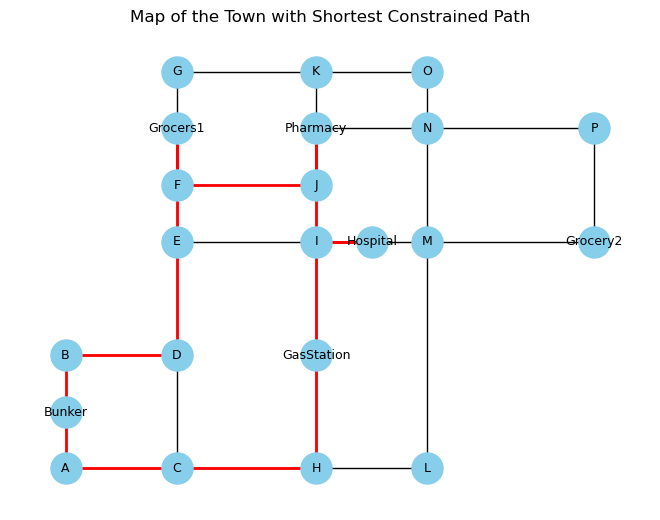

In [82]:
import networkx as nx
import matplotlib.pyplot as plt
from scipy.spatial import distance

locations = {
    "Bunker": (0, 100), "Grocers1": (200, 600), "Pharmacy": (450, 600),
    "Hospital": (550, 400), "Grocery2": (950, 400), "GasStation": (450, 200),
    "A": (0,0), "B": (0,200), "C": (200, 0), "D": (200, 200), "E": (200, 400),
    "F": (200, 500), "G": (200, 700), "H": (450, 0), "I": (450, 400), "J": (450, 500),
    "K": (450, 700), "L": (650, 0), "M": (650, 400), "N": (650, 600), "O": (650, 700),
    "P": (950, 600)
}

edges = [
    ("Bunker", "A"), ("Bunker", "B"), ("A", "C"), ("B", "D"),
    ("C", "D"), ("C", "H"), ("D", "E"), ("E", "I"), ("E", "F"),
    ("F", "J"), ("F", "Grocers1"), ("Grocers1", "G"), ("G", "K"),
    ("K", "O"), ("K", "Pharmacy"), ("Pharmacy", "N"), ("Pharmacy", "J"),
    ("J", "I"), ("Hospital", "M"), ("I", "Hospital"), ("I", "GasStation"),
    ("GasStation", "H"), ("H", "L"), ("L", "M"), ("M", "Grocery2"),
    ("Grocery2", "P"), ("P", "N"), ("N", "M"), ("N", "O")
]

G = nx.Graph()
for node, pos in locations.items():
    G.add_node(node, pos=pos)
for u, v in edges:
    dist = distance.euclidean(locations[u], locations[v])
    G.add_edge(u, v, weight=dist)

required_nodes = {
    "Grocers": ["Grocers1", "Grocery2"], 
    "Pharmacy": "Pharmacy",
    "Hospital": "Hospital",
    "GasStation": "GasStation"
}

# Grocer 1
def find_constrained_shortest_path(G, start, end, required_nodes):
    optional_grocery_stores = required_nodes["Grocers"]
    other_required_nodes = [required_nodes["Pharmacy"], required_nodes["Hospital"], required_nodes["GasStation"]]
    
    min_path = None
    min_length = float('inf')
    

    nodes_to_visit = [start, "Grocers1"] + other_required_nodes + [end]
        
                            #Find shortest path with each grocer
    path = []
    total_length = 0
    for i in range(len(nodes_to_visit) - 1):
        sub_path = nx.shortest_path(G, source=nodes_to_visit[i], target=nodes_to_visit[i + 1], weight='weight')
        path += sub_path[:-1]  
        total_length += nx.shortest_path_length(G, source=nodes_to_visit[i], target=nodes_to_visit[i + 1], weight='weight')
    path.append(end)  
        

    return path, total_length

start_node = "Bunker"
end_node = "Bunker" 
path, path_length = find_constrained_shortest_path(G, start_node, end_node, required_nodes)

print("Shortest path with constraints:", path)
print("Path length:", path_length)

pos = nx.get_node_attributes(G, 'pos')
nx.draw(G, pos, with_labels=True, node_size=500, node_color='skyblue', font_size=9, font_color='black')
path_edges = [(path[i], path[i+1]) for i in range(len(path)-1)]
nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=2)
plt.title('Map of the Town with Shortest Constrained Path')
plt.show()

## <span style="color:plum">Problem 2 :</span> Finding the Optimal Route While Traveling Grocers1

Shortest path with constraints: ['Bunker', 'B', 'D', 'E', 'I', 'Hospital', 'M', 'Grocery2', 'P', 'N', 'Pharmacy', 'J', 'I', 'Hospital', 'I', 'GasStation', 'H', 'C', 'A', 'Bunker']
Path length: 3300.0


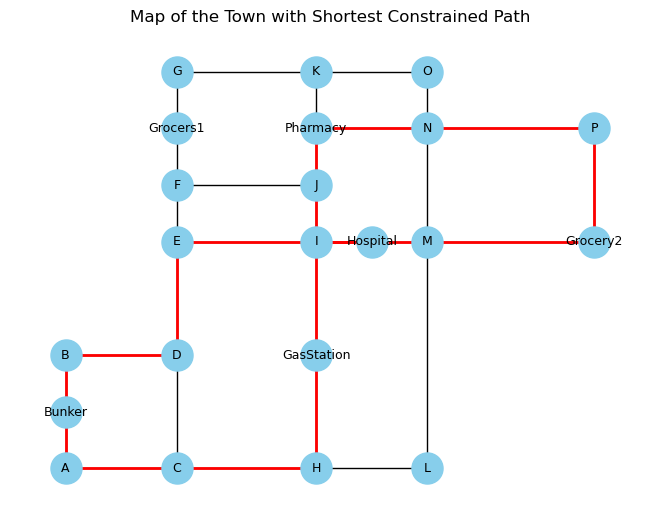

In [86]:
def find_constrained_shortest_path(G, start, end, required_nodes):
    optional_grocery_stores = required_nodes["Grocers"]
    other_required_nodes = [required_nodes["Pharmacy"], required_nodes["Hospital"], required_nodes["GasStation"]]
    
    min_path = None
    min_length = float('inf')
    

    nodes_to_visit = [start, "Grocery2"] + other_required_nodes + [end]
        

    path = []
    total_length = 0
    for i in range(len(nodes_to_visit) - 1):
        sub_path = nx.shortest_path(G, source=nodes_to_visit[i], target=nodes_to_visit[i + 1], weight='weight')
        path += sub_path[:-1]  
        total_length += nx.shortest_path_length(G, source=nodes_to_visit[i], target=nodes_to_visit[i + 1], weight='weight')
    path.append(end)  
       
    
    return path, total_length

start_node = "Bunker"
end_node = "Bunker" 
path, path_length = find_constrained_shortest_path(G, start_node, end_node, required_nodes)

print("Shortest path with constraints:", path)
print("Path length:", path_length)

pos = nx.get_node_attributes(G, 'pos')
nx.draw(G, pos, with_labels=True, node_size=500, node_color='skyblue', font_size=9, font_color='black')
path_edges = [(path[i], path[i+1]) for i in range(len(path)-1)]
nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=2)
plt.title('Map of the Town with Shortest Constrained Path')
plt.show()